In [24]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('benchmark/results.csv')
data

,Timestamp,GPU,# of GPUs,Server,Concurrency,Model,# of Requests,BatchSize,Theta (inf/s)
0,21:44:30.099514,V100-SXM2-32GB,1,1,1,small_lstm,1024,32,3085.680242
1,21:44:40.721596,V100-SXM2-32GB,2,1,1,small_lstm,1024,32,3006.975552
2,21:44:51.621896,V100-SXM2-32GB,3,1,1,small_lstm,1024,32,3926.318557
3,21:44:59.971743,V100-SXM2-32GB,4,1,1,small_lstm,1024,32,3383.820929
4,21:45:09.658139,V100-SXM2-32GB,5,1,1,small_lstm,1024,32,4031.062798
5,21:45:17.789635,V100-SXM2-32GB,6,1,1,small_lstm,1024,32,3449.395944
6,21:45:27.292149,V100-SXM2-32GB,1,1,1,medium_cnn,1024,32,507.634440
7,21:46:31.845159,V100-SXM2-32GB,2,1,1,medium_cnn,1024,32,565.124643
8,21:47:29.833031,V100-SXM2-32GB,3,1,1,medium_cnn,1024,32,564.881992
9,21:48:27.845630,V100-SXM2-32GB,4,1,1,medium_cnn,1024,32,565.932748


In [25]:
from cloudmesh.common.Shell import Shell
def save_image(filename=None, dpi=300):
    # os.system("mkdir -p out")
    Shell.mkdir("out")
    plt.savefig(f"out/{filename}.png", dpi=dpi)
    plt.savefig(f"out/{filename}.svg")
    plt.savefig(f"out/{filename}.pdf")

Fig. 7.
Throughput vs. GPUs

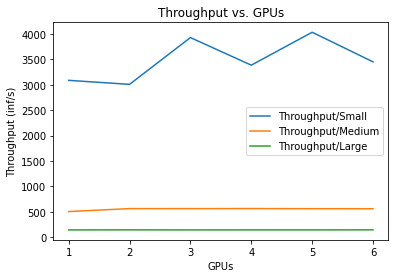

In [26]:
small_data = data[data['Model']=='small_lstm']
medium_data = data[data['Model']=='medium_cnn']
large_data = data[data['Model']=='large_tcnn']

fig, ax = plt.subplots()
ax.plot(small_data['# of GPUs'], small_data['Theta (inf/s)'], label='Throughput/Small')
ax.plot(medium_data['# of GPUs'], medium_data['Theta (inf/s)'], label='Throughput/Medium')
ax.plot(large_data['# of GPUs'], large_data['Theta (inf/s)'], label='Throughput/Large')

ax.set_title('Throughput vs. GPUs')
ax.set_xlabel('GPUs')
ax.set_ylabel('Throughput (inf/s)')

ax.legend()

save_image("throughput-vs-gpus")

plt.show()